# Практическая работа 10 ВИЗУАЛИЗАЦИЯ ДАННЫХ

##Выполнил студент ПИН-Б-З-22-1 Гадиян Сергей Гариевич

### Подключение библиотек

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/enikolaev/MMO/main/datasets/telecom_churn/telecom_churn.csv'
data = pd.read_csv(url)
#просмотр первых 10 строк данных
data.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### Одиночные признаки
#### Количественные признаки

In [ ]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

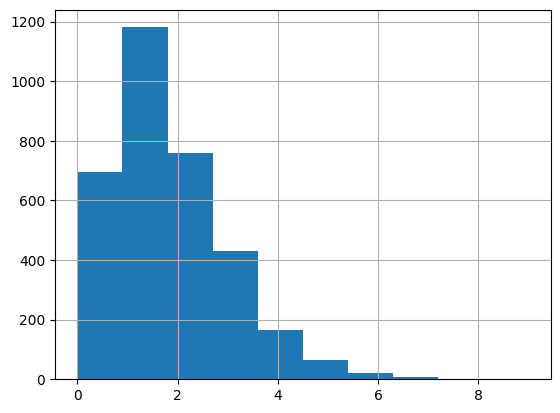

In [ ]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['Customer service calls'].hist();

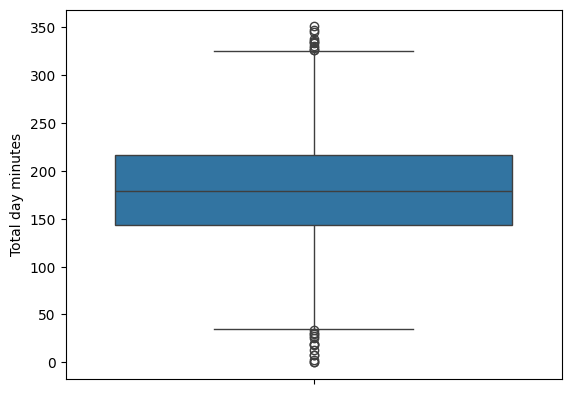

In [ ]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['Total day minutes']);

<ipython-input-7-3283017478>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='State',


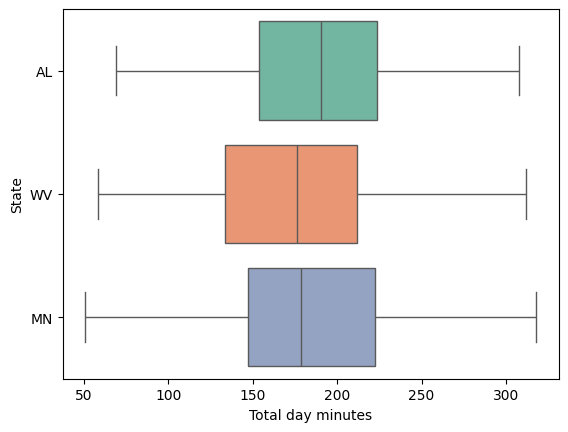

In [ ]:
top_data = data[['State','Total day minutes']]
top_data = top_data.groupby('State').sum()
top_data = top_data.sort_values('Total day minutes',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='State',
            x='Total day minutes',
            data=data[data.State.isin(top_data)], palette='Set2');

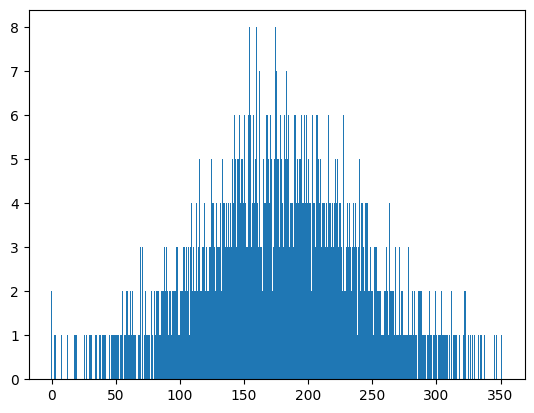

In [ ]:
hist = data['Total day minutes'].value_counts()
plt.bar(hist.index, hist);

In [ ]:
feats=[f for f in data.columns if 'charge' in f]
feats

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

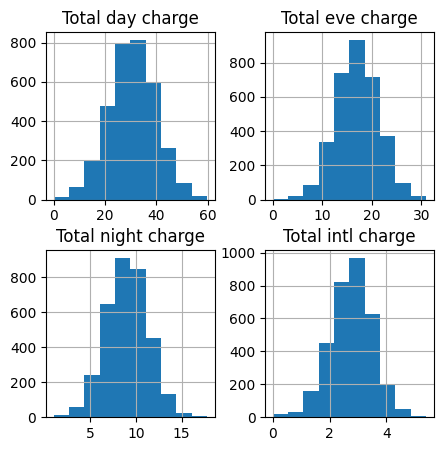

In [ ]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

In [ ]:
# фактически бинарный признак
data['Churn'].value_counts()

,count
Churn,
False,2850
True,483


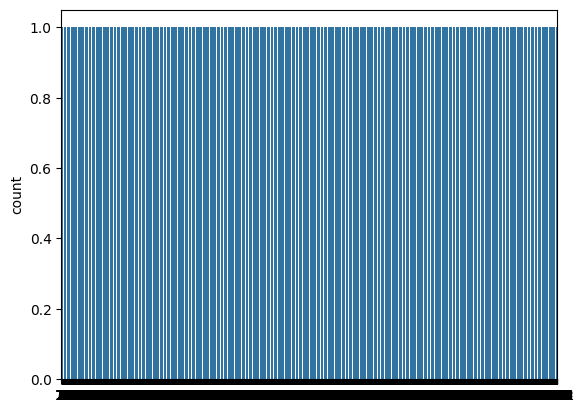

In [ ]:
sns.countplot(data['Churn']);

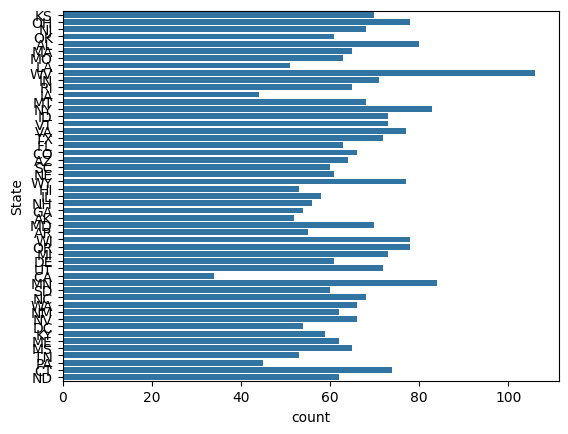

In [ ]:
# гистограмма для всех штатов
sns.countplot(data['State']);

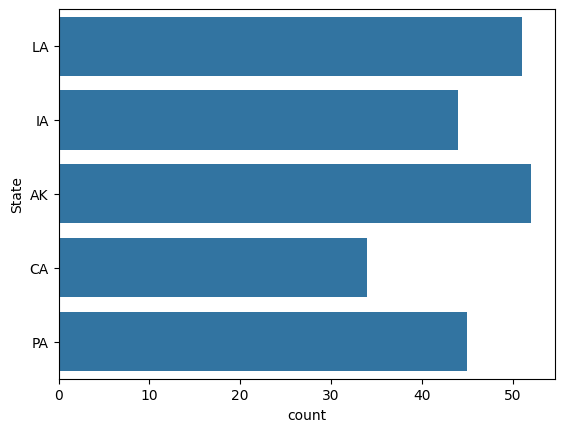

In [ ]:
# гистограмма "популярных" штатов
sns.countplot(data[data['State'].isin(data['State'].value_counts().tail(5).index)]['State']);

### Взаимосвязанные признаки
#### Количественный - количественный

In [ ]:
# список колонок
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'charge' in f]
len(feats)
# feats=['Total day calls', 'Total day charge']

4

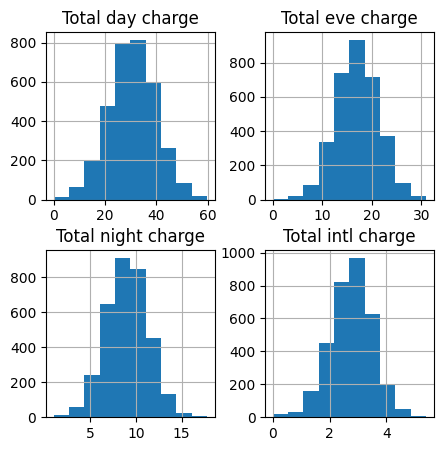

In [ ]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

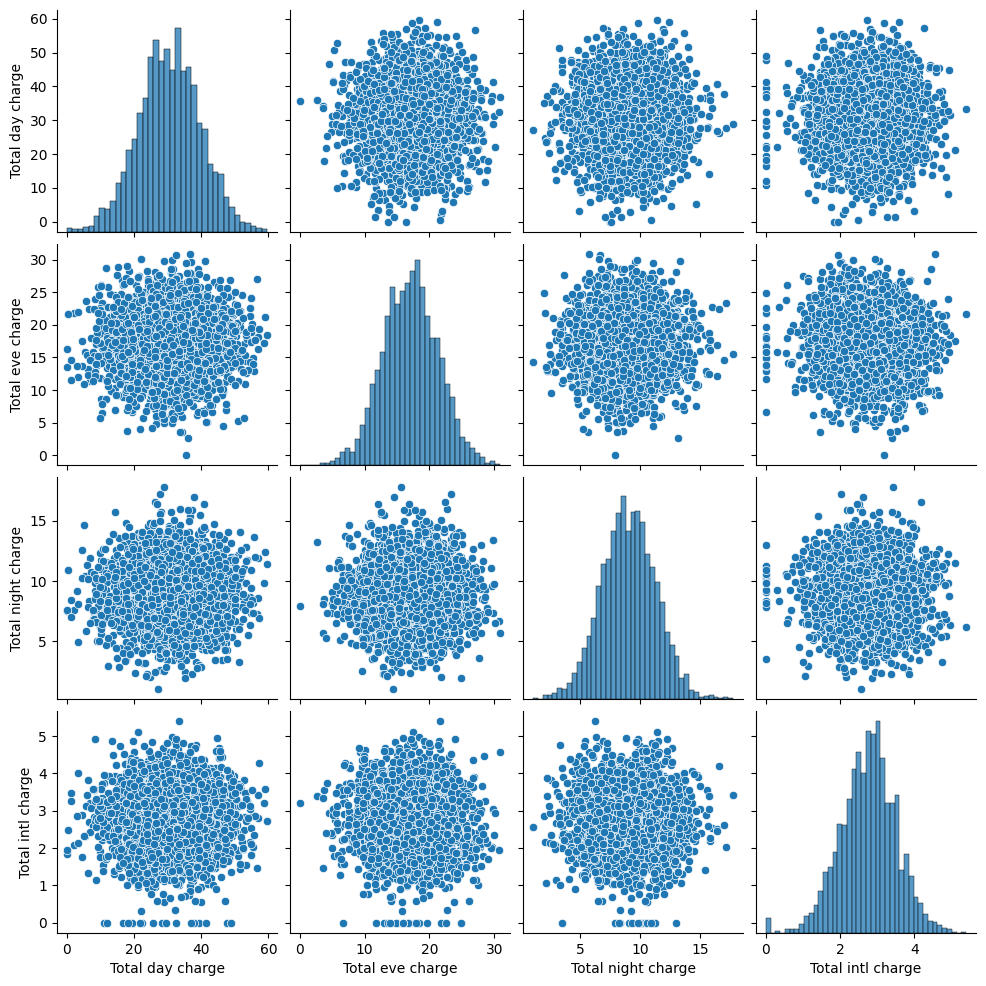

In [ ]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

Можно строить более сложные попарные распределения признаков

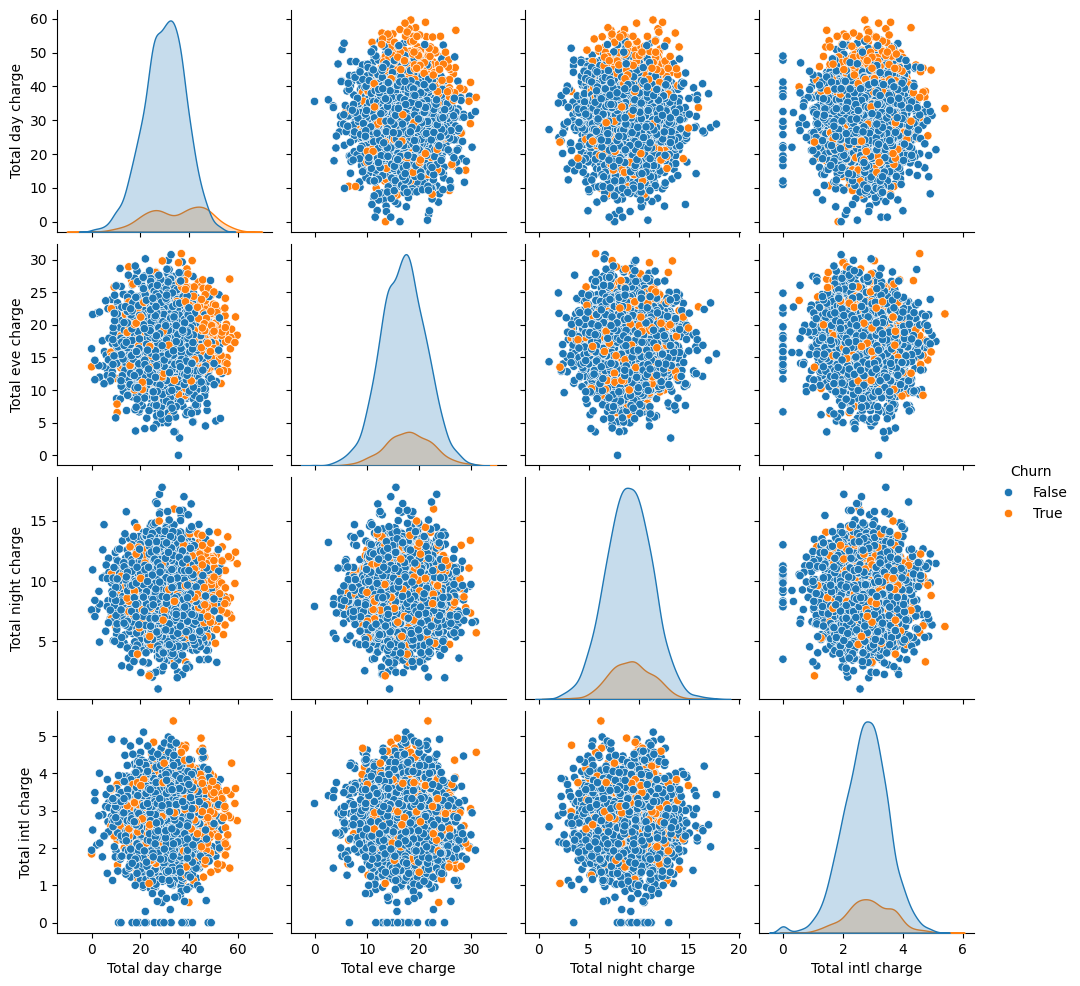

In [ ]:
sns.pairplot(data[feats + ['Churn']], hue='Churn');

Использование matplotlib, подписей данных, заголовков
Использование простейших пользовательских цветов

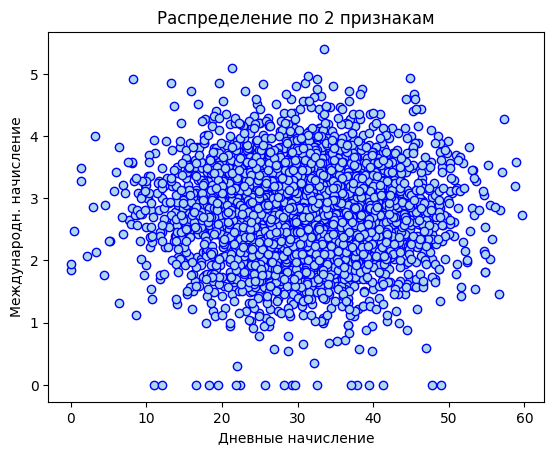

In [ ]:
plt.scatter(data['Total day charge'],
            data['Total intl charge'],
            color='lightblue', edgecolors='blue')
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение по 2 признакам');

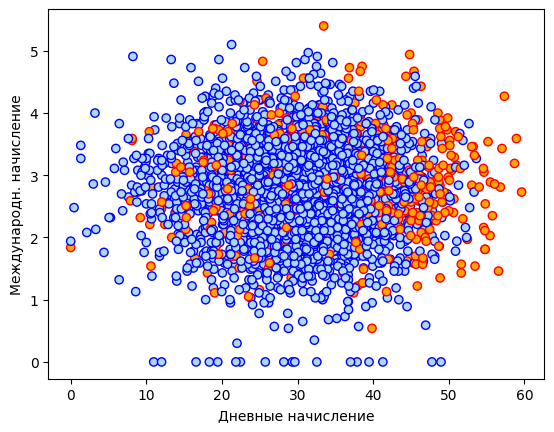

In [ ]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['Churn'].map({False: 'lightblue', True: 'orange'})
edge_c = data['Churn'].map({False: 'blue', True: 'red'})
# Настройка графика
plt.scatter(data['Total day charge'], data['Total intl charge'],
            color=c, edgecolors=edge_c
           )
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление');

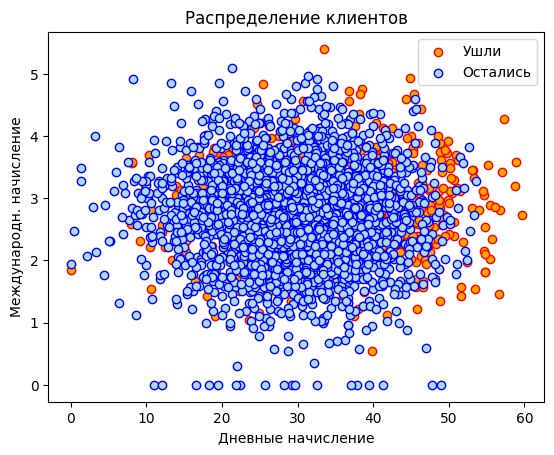

In [ ]:
# Раскраска лояльных и ушедших клиентов,
# добавление легенды

# Ушедшие клиенты
data_churn = data[data['Churn']]
# Оставшиеся клиенты
data_loyal = data[~data['Churn']]

plt.scatter(data_churn['Total day charge'],
            data_churn['Total intl charge'],
            color='orange',
            edgecolors='red',
            label='Ушли'
           )
plt.scatter(data_loyal['Total day charge'],
            data_loyal['Total intl charge'],
            color='lightblue',
            edgecolors='blue',
            label='Остались'
           )
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение клиентов')
plt.legend();

## Контрольные вопросы
1.
Какие инструментальные средства используются для организации
рабочего места специалиста Data Science?

Для организации рабочего места специалиста в области Data Science используются:


Языки программирования: Python, R

Библиотеки: NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn

Среды разработки: Jupyter Notebook, VS Code, PyCharm, Spyder

Системы управления данными: SQL, Excel, CSV

Инструменты визуализации: Tableau, Power BI

Системы контроля версий: Git, GitHub
2. Какие библиотеки Python используются для работы в области машинного
обучения? Дайте краткую характеристику каждой библиотеке.

NumPy	Работа с многомерными массивами и математическими операциями

Pandas	Обработка и анализ табличных данных

Matplotlib / Seaborn	Визуализация данных

Scikit-learn (sklearn)	Реализация классических алгоритмов машинного обучения

TensorFlow / Keras / PyTorch	Глубокое обучение и нейронные сети

XGBoost / LightGBM	Высокоэффективные реализации градиентного бустинга

Plotly	Интерактивная визуализация
3. Почему при реализации систем машинного обучения широкое
распространение получили библиотеки Python?

Простой синтаксис

Большой выбор библиотек

Поддержка сообщества

Гибкость и читаемость кода

Интеграция с другими системами
4. Перечислите функции Python, которые были изучены в рамках данной
лабораторной работы и которые используются для визуализации данных.

plt.hist() — гистограмма

plt.scatter() — точечный график

sns.boxplot() — ящик с усами

sns.countplot() — столбчатая диаграмма

sns.pairplot() — попарные графики

sns.heatmap() — тепловая карта корреляции
5. Какая библиотека python предназначена для управления наборами данных:
numpy, pandas, sklearn, opencv, matplotlib?
- pandas
6. Какая стратегия является нежелательной при обработке пропусков в
данных?

а) замена пропущенных значений в столбце медианным значением по
данному столбцу;

б) удаление строк, содержащих пропуски в данных; - ВЕРНО

в) замена пропущенных значений в столбце средним арифметическим
значением по данному столбцу;

г) замена пропущенных значений в столбце наиболее часто встречающимся
значением по данному столбцу;
7. Обоснуйте ответ на следующую проблему предварительной обработки
данных: имеется независимая категориальная переменная y, которая представляет
собой категориальный признак, опеределнный на домене {C#, Java, Python, R}.
Нужно ли применять к данному целевому признаку OneHotEncoder?


Нет, не нужно применять OneHotEncoder к целевой переменной (y) в задачах классификации.
Целевая переменная обычно кодируется с помощью LabelEncoder, а не OneHotEncoder, так как это выход модели, а не входной признак.